<a href="https://colab.research.google.com/github/gfeyzakorkmaz/gfeyzakorkmaz/blob/main/pythonday24.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os
from sklearn.preprocessing import StandardScaler
from mpl_toolkits.mplot3d import Axes3D

In [21]:
path = '/content/drive/MyDrive/Dataset/customer_data.xlsx'
df = pd.read_excel(path)
df.head()

,Customer ID,Age,Gender,Total Spent ($),Date,Comments
0,ID0001,27,Male,485.45,2024-08-30,Had some issues with delivery.
1,ID0002,20,Male,958.32,2024-09-28,"Overall, satisfied."
2,ID0003,36,Non-binary,107.79,2024-10-07,Delivery was fast and smooth.
3,ID0004,49,Female,502.01,2024-08-20,Received a damaged item.
4,ID0005,54,Male,939.33,2024-08-24,Product quality could be better.


In [10]:
directory_path = os.path.dirname(path)
print(os.listdir(directory_path))

['DATA.xlsx', 'extended_marketing_data.xlsx', 'marketing_analysis_data.xlsx', 'customer_data.xlsx']


In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


def plotPerColumnDistribution(df, nGraphShown, nGraphPerRow):
    nunique = df.nunique()
    df = df[[col for col in df if nunique[col] > 1 and nunique[col] < 50]]
    nRow, ncol = df.shape
    columnNames = list(df)
    nGraphRow = int(ncol + nGraphPerRow - 1) / nGraphPerRow
    plt.figure(num = None, figsize = (6 * nGraphPerRow, 8 * nGraphRow), dpi = 80, facecolor= 'w', edgecolor = 'k')
    for i in range(min(ncol, nGraphShown)):

        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = df.iloc[:, i]
        if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        plt.ylabel('counts')
        plt.xticks(rotation = 90)
        plt.title(f'{columnNames[i]} (column {i})')
        plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)
        plt.show()

df = pd.read_excel(path)
df['Date'] = pd.to_datetime(df['Date'])

plotPerColumnDistribution(df, 10, 5)

ValueError: Number of rows must be a positive integer, not 2.0

<Figure size 2400x1280 with 0 Axes>

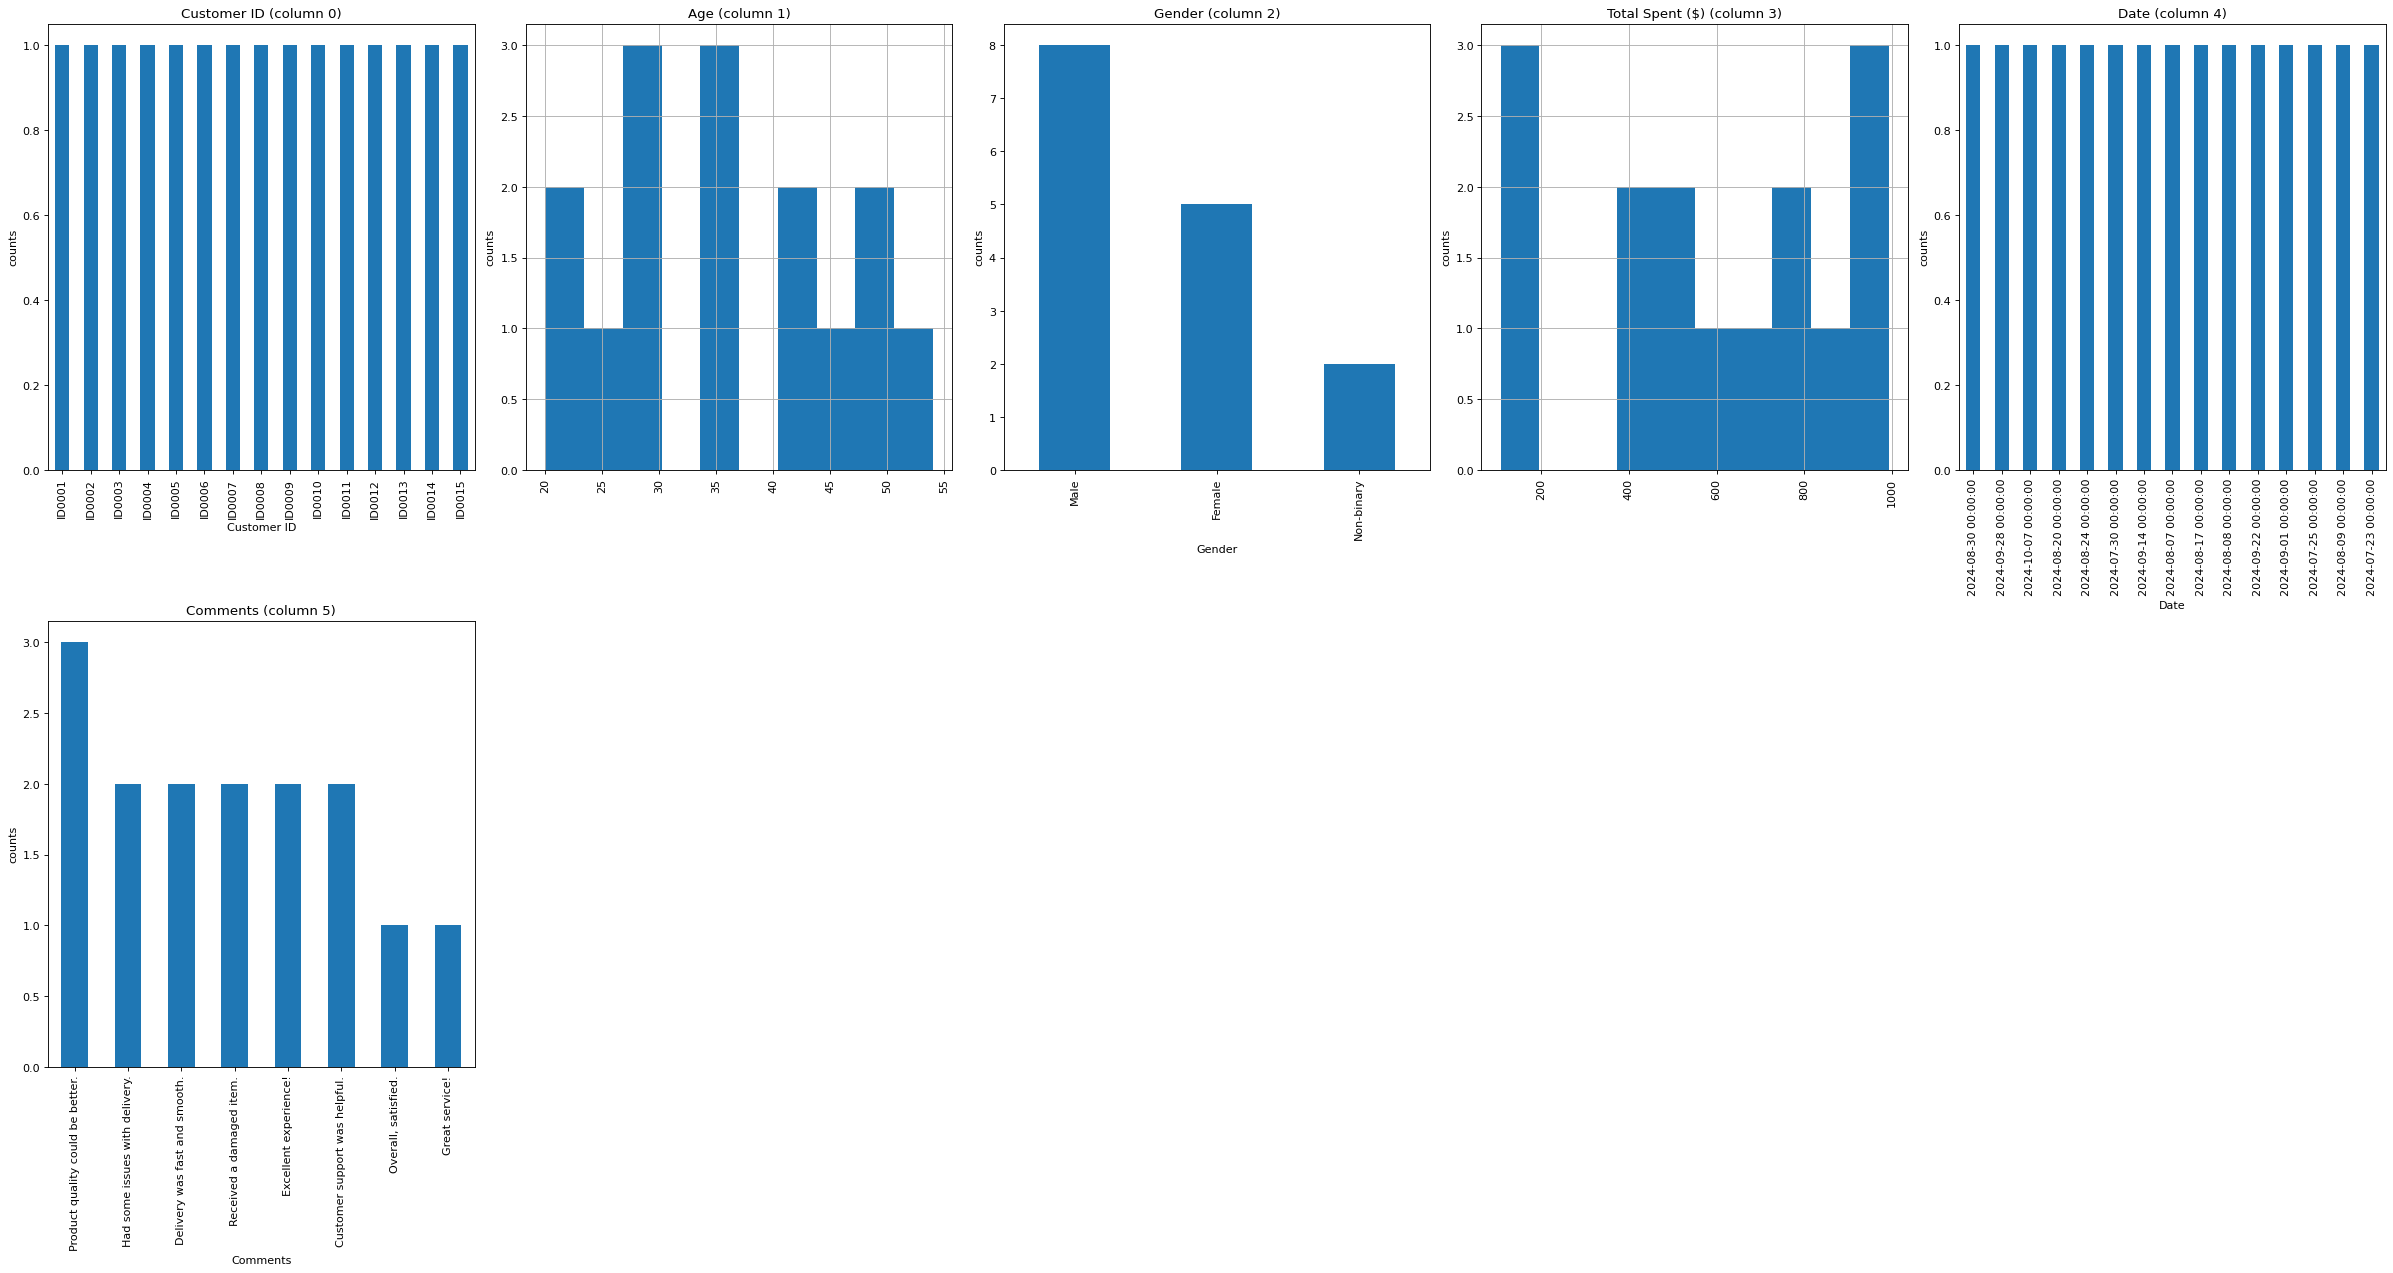

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Ensure nGraphRow is an integer
def plotPerColumnDistribution(df, nGraphShown, nGraphPerRow):
    nunique = df.nunique()
    df = df[[col for col in df if nunique[col] > 1 and nunique[col] < 50]]
    nRow, ncol = df.shape
    columnNames = list(df)
    nGraphRow = int((ncol + nGraphPerRow - 1) / nGraphPerRow)  # Ensure nGraphRow is an integer
    plt.figure(num=None, figsize=(6 * nGraphPerRow, 8 * nGraphRow), dpi=80, facecolor='w', edgecolor='k')
    for i in range(min(ncol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = df.iloc[:, i]
        if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        plt.ylabel('counts')
        plt.xticks(rotation=90)
        plt.title(f'{columnNames[i]} (column {i})')
    plt.tight_layout(pad=1.0, w_pad=1.0, h_pad=1.0)
    plt.show()

# Read the CSV file into a DataFrame
df = pd.read_excel(path)

# Convert 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Visualize the data
plotPerColumnDistribution(df, 10, 5)